In [3]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import pandas as pd
import seaborn
import copy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from jupyterthemes import jtplot
jtplot.style() # add theme style to plots
%matplotlib inline

<br>
<br>
# Thinkful Data Science Prep CapStone

## US Net Foreign Investment Relative To The Subprime Crisis

- - - -

    Prepared by: AJ Igherighe
    Prepared for: Thinkful Prep Bootcamp



<br>
<strong>Figure 1: 2017 Returns By Major US Indices</strong>

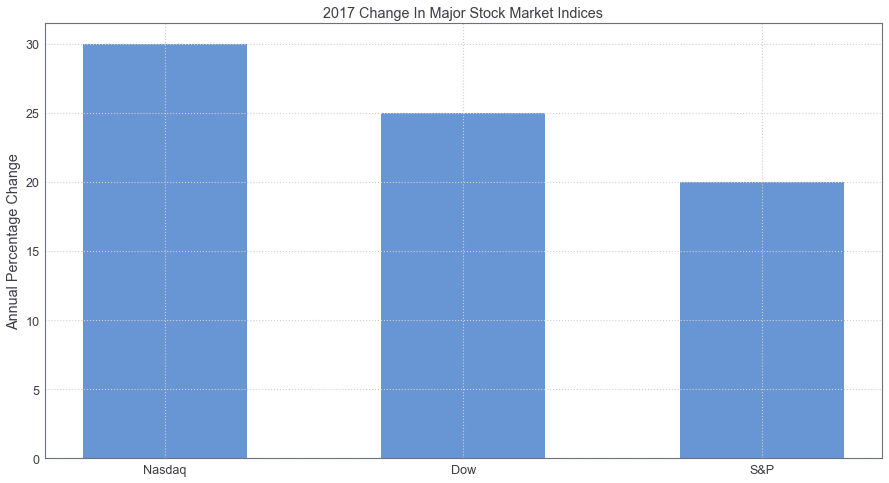

In [3]:
def create_barchart(data, values_column, xlabel, ylabel, title):
    """plot provided data into a bar chart"""
    fig = plt.figure(figsize=(15, 8))
    values = list(data[values_column])
    objects = (data.index)
    y_pos = np.arange(len(objects))
    bar_width = 0.55
    plt.bar(y_pos, values, bar_width, align='center', alpha=0.75)
    plt.xticks(y_pos, objects)
    # plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(linestyle='dotted')
    plt.show()

# stock market gain data from cnn money
stock_gains = {
    # dictionary with 2017 stock market index data
    'Index': ['Nasdaq', 'Dow', 'S&P'], 
    'Returns': [30, 25, 20]
}

# create and sort dataframe from dictionary
df_gains = pd.DataFrame.from_dict(stock_gains)
df_gains.set_index(keys='Index', inplace=True)

# create chart using barchart function
xlabel = 'Indices'
ylabel = 'Annual Percentage Change'
graph_title = '2017 Change In Major Stock Market Indices'
data_column = 'Returns'

create_barchart(df_gains, data_column, xlabel, ylabel, graph_title)

**BACKGROUND**

<br>
The United States' stock market is currently in the second longest bull market in history. 2017 was a phenomenal year for investors.  As Figure 1 illustrates, the Nasdaq, Dow, and S&P 500 earned 30%, 25%, and 20% 2017 returns<sup>[1](#f1)</sup>, respectively.  On the surface, the reasons for these gains appear obvious:

 - <u>Lower Market Capitalizations Following The Great Recession</u>.  Triggered by what is now commonly called the "Subprime Mortgage Crisis," which arguably started with the bankruptcy of New Century in April 2007 <sup>[2](#f2)</sup>, the US economy experienced its greatest retraction since the Great Depression.  In turn, the stock market experienced significant declines. As an example, the Dow Jones Industrial Average, a composite of the 30 largest public companies by market capitalization and considered by many investors as the least volatile stocks, lost 50% of its value between October 8, 2007 and March 5, 2009.  However, the United States was not affected alone.  Some experts estimate stock market losses worldwide from the crisis and subsequent recession could be nearly 10 trillion USD. <sup>[3](#f3)</sup>

 - <u>A Massive Global Bailout, Stimulus, And Cheap Capital</u>.  Many argue with the actions taken to help institutions and homeowners during and following the subprime crisis.  However, Ryan Barnes in an Investopedia article paints the dire picture facing the markets:

<br>
<div class="alert alert-block alert-success">"Dozens of mortgage lenders declare bankruptcy in a matter of weeks. The market is filled with concerns of a major global credit crunch, which could affect all classes of borrowers. Central banks use emergency clauses to inject liquidity into scared financial markets. The real estate markets plummet after years of record highs. Foreclosure rates double year-over-year during the latter half of 2006 and in 2007." <sup>[4](#f4)</sup></div>
<br>

<ol> As investors panicked, concern emerged that, left unchecked, the subprime mortgage issue could spark a self-reinforcing liquidity crisis leading to the bankruptcy of additional global financial institutions, and possibly even some governments.  With evidence quickly mounting - for instance, after months of uncertainty about a potential capital infusion, Lehman Brothers filed bankruptcy in Fall 2008 <sup>[3](#f3)</sup> - the US government was arguably forced to take action to prevent further deterioration:</ol>

<ul style="padding-left:60px">
<li>It seized Fannie Mae and Freddie Mac to prevent their failure and to infuse confidence into lending markets.</li><br>
<li>It presented programs to encourage banks to re-configure loans for deliquent borrowers and those with mortgages exceed their current home values rather than rush to foreclose.</li><br>
<li>It lowered short-term interest rates effectively to 0% to encourage banks to borrow and inject liquidity into the market.</li><br>
<li>It purchased mortgage-backed securities and long-term bonds allowing troubled insitutions to strengthen their balance sheets, infusing liquidity into the market directly, and encouraging other financial institutions to provide additional liquidity by reducing longer-term interest rates. <sup>[2](#f2)</sup></li> 
</ul>

Now, that it appears the US, and many other nations, have recovered from The Great Recession <sup>[5](#f5)</sup> and there the US, Britain, and several other developed nations appear to be going through a period of political nationalism (the latter point is based on Donald Trump's election, "Brexit", and other events outside the scope of this analysis), it raises a few key questions about the past and future of US foreign investment.

Assuming a major part of what threatened to turn a primarily US problem into a global catastrophe was foreign investment in US securities - especially, complex derivatives called Collateralized Debt Obligations (CDOs) which disquised, arguably unintentionally, the risks associated with subprime mortgages:
<br>
<br>
<ol style="padding-left:60px">
    <b><li>What have US net foreign investment trends been historically?</li></b>
    <br>
    <b><li>Did it increase significantly in the periods leading up to the crisis as investors were largely unaware of the risks and financial institutions were earning signficant profits?</li></b>
    <br>
    <b><li>Following the crisis, has there been an obvious, permanent change in net foreign investment?</li></b>
    <br>
</ol>
<br>
<div align="center">
- - - - - -
</div>
<br>

**METHODOLOGY**

<br>
To meet the requirements outlined in Unit 4 | Lesson 2 | Project 2, this *Analytic Report and Research Proposal* will follow these steps:

<ul style="padding-left:60px">
    <li><u>Describe the selected dataset</u>.  This analysis is conducted on U.S. Net Foreign Investment Data from the U.S. Department of Commerce's Bureau of Economic Analysis. <sup>[6](#f6)</sup></li><br>
    <li><u>Ask and answer a set of analytical questions</u>. To the extent the data allows, this report will address the three questions outlined at the end of the Background section.</li><br>
    <li><u>Propose further research</u>. Finally, based on findings from the conducted analysis, the conclusion will contain ideas for additional exploration with skills and techniques from Thinkful's full bootcamp.</li><br>
 </ul>

<div align="center">
- - - -
</div>
<br>

**DESCRIBE DATA**

<br>
To better understand the data provided by the U.S. Department of Commerce, the downloaded .csv file will be read into a Pandas Dataframe.  Once in memory, a series of quick, highlevel analytics will be conducted to see what, if any, insights immediately develop. 

<br>
*(Note: Pandas was unable to parse the original csv file. After a review of the data in a spreadsheet program, a number of unnecessary rows and columns at the beginning of the file were deleted.)*


In [8]:
def create_dataframe(csv_file):
    """read a supplied csv file and returns a pandas dataframe"""
    try:
        data = pd.read_csv(csv_file)
        return data.copy()
    except:
        print('Error reading csv file into dataframe.')

file = './Data/netinvest_clean.csv'
df_start = create_dataframe(file)
df_start.head()
df_start.tail()

,�Type of investment,�1976,�1977,�1978,�1979,�1980,�1981,�1982,�1983,�1984,...,�2007,�2008,�2009,�2010,�2011,�2012,�2013,�2014,�2015,�2016
0,U.S. net international investment position (li...,80539,98585,128273,232250,296862,226992,238366,261494,140140,...,-1279493,-3995303,-2627626,-2511788,-4454997,-4518300,-5372654,-6980245,-7493479,-8318378
1,Net international investment position excl...,80539,98585,128273,232250,296862,226992,238366,261494,140140,...,-1350965,-4154938,-2753961,-2622170,-4541036,-4576076,-5450211,-7065777,-7549793,-8379684
2,"Financial derivatives other than reserves,...",n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,71472,159635,126335,110382,86039,57776,77557,85532,56314,61306
3,U.S. assets,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,...,20704503,19423416,19426459,21767827,22208896,22562162,24144775,24832583,23352371,23849445
4,Assets excluding financial derivatives (...,371424,429060,526090,680460,839083,832943,1030358,1206656,1214478,...,18145171,13295966,15936680,18115514,17492318,18942401,21127675,21580275,20924130,21640465


,�Type of investment,�1976,�1977,�1978,�1979,�1980,�1981,�1982,�1983,�1984,...,�2007,�2008,�2009,�2010,�2011,�2012,�2013,�2014,�2015,�2016
58,Currency and deposits,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,2020793,2331692,2248451,2364754,2838712,2601672,2674496,2889952,2947046,2949843
59,Loans,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,2926354,2458056,2211894,2238430,2165106,2080724,2344810,2253658,1962815,1925794
60,Insurance technical reserves,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
61,Trade credit and advances,n.a.,n.a.,21333,22660,31471,29490,30085,29005,29808,...,80034,86495,93068,111754,128849,140504,148007,160337,168444,175467
62,Special drawing rights allocations,2665,2787,2989,4173,5155,5703,5405,5130,4803,...,7742,7547,55364,54387,54219,54277,54386,51166,48938,47476


An initial review of the top and bottom 5 rows of the data shows a few factors that must be addressed before starting the analysis:

* the actual timeline from available data is 1976-2016 (so 2017's performance is missing)
* the data needs to be cleaned to remove the symbols in the date header row 
* missing informatin in some years should be highlighted to prevent potentially skewed results

<br>
<br>
<div align="center">
- - - - - -
</div>
<br>

**Footnotes**

[<a name="f1">1</a>] http://money.cnn.com/2018/01/02/investing/stock-market-2018-outlook/index.html <br>
[<a name="f2">2</a>] https://www.federalreservehistory.org/essays/subprime_mortgage_crisis <br>
[<a name="f3">3</a>] https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp <br>
[<a name="f4">4</a>] https://www.investopedia.com/articles/07/subprime-overview.asp#ixzz54wBqEgCY <br>
[<a name="f5">5</a>] https://www.cbpp.org/research/economy/chart-book-the-legacy-of-the-great-recession, https://www.bloomberg.com/news/articles/2017-08-31/canada-s-economy-surges-4-5-on-consumer-spending-key-takeaways, https://www.imf.org/en/News/Articles/2017/05/18/NA190517Latin-America-and-the-Caribbean-Bouncing-Back-from-Recession <br>
[<a name="f6">6</a>] https://www.bea.gov/international/bp_web/tb_download_type_modern.cfm?list=2&RowID=144<br>
<br>
<br>
**Supplemental Information**<br>
http://www.globalissues.org/article/768/global-financial-crisis<br>
https://www.investopedia.com/university/credit-crisis/credit-crisis6.asp<br>
https://www.thebalance.com/stock-market-crash-of-2008-3305535<br>
http://knowledge.wharton.upenn.edu/article/mortgage-crisis-bailout-relief-for-some-risk-for-others/<br>